# 第一个线性感知机算法：PLA

#示例代码来源
https://github.com/RedstoneWill/MachineLearningInAction/tree/master

## 1. 什么是感知机（Perceptron）

**PLA**全称是Perceptron Linear Algorithm，即线性感知机算法，属于一种最简单的**感知机**（Perceptron）模型。

感知机模型是机器学习二分类问题中的一个非常简单的模型。它的基本结构如下图所示：

![](img/../pic/1.jpg)

其中，$x_i$是输入，$w_i$表示**权重系数**，$b$表示**偏移常数**。感知机的线性输出为：

$$scores=\sum_i^Nw_ix_i+b$$

为了简化计算，通常我们将$b$作为**权重系数**的一个维度，即$w_0$。同时，将输入$x$扩展一个维度，为1。这样，上式简化为：

$$scores=\sum_i^{N+1}w_ix_i$$

$scores$是感知机的输出，接下来就要对$scores$进行判断：

* 若$scores\geq0$，则$\hat y=1$（正类）

* 若$scores<0$，则$\hat y=-1$（负类）

以上就是线性感知机模型的基本概念，简单来说，它由**线性得分计算**和**阈值比较**两个过程组成，最后根据比较结果判断样本属于正类还是负类。

## 2. PLA理论解释

对于二分类问题，可以使用感知机模型来解决。PLA的基本原理就是**逐点修正**，首先在超平面上随意取一条分类面，统计分类错误的点；然后随机对某个错误点就行修正，即变换直线的位置，使该错误点得以修正；接着再随机选择一个错误点进行纠正，分类面不断变化，直到所有的点都完全分类正确了，就得到了最佳的分类面。

利用二维平面例子来进行解释，第一种情况是错误地将正样本（y=1）分类为负样本（y=-1）。此时，$wx<0$，即$w$与$x$的夹角大于90度，分类线$l$的两侧。修正的方法是让夹角变小，修正$w$值，使二者位于直线同侧：

$$w:=w+x=w+yx$$

修正过程示意图如下所示：

![](img/../pic/2.jpg)

第二种情况是错误地将负样本（y=-1）分类为正样本（y=1）。此时，$wx>0$，即$w$与$x$的夹角小于90度，分类线$l$的同一侧。修正的方法是让夹角变大，修正$w$值，使二者位于直线两侧：

$$w:=w-x=w+yx$$

修正过程示意图如下所示：

![](img/../pic/3.jpg)

经过两种情况分析，我们发现PLA每次$w$的更新表达式都是一样的：$w:=w+yx$。掌握了每次$w$的优化表达式，那么PLA就能不断地将所有错误的分类样本纠正并分类正确。

## 3. 数据准备

### 导入数据

数据集存放在'../data/'目录下，该数据集包含了100个样本，正负样本各50，特征维度为2。

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('./data/data1.csv', header=None)
# 样本输入，维度（100，2）
X = data.iloc[:,:2].values
# 样本输出，维度（100，）
y = data.iloc[:,2].values

### 数据分类与可视化

下面我们在二维平面上绘出正负样本的分布情况。

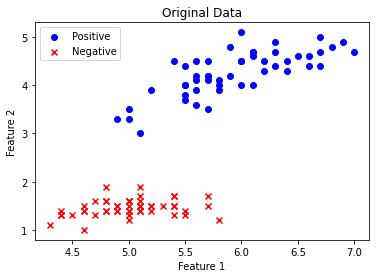

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:50, 0], X[:50, 1], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 0], X[50:, 1], color='red', marker='x', label='Negative')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.title('Original Data')
plt.show()

## 4. PLA算法

### 特征归一化

首先分别对两个特征进行归一化处理，即：

$$X=\frac{X-\mu}{\sigma}$$

其中，$\mu$是特征均值，$\sigma$是特征标准差。

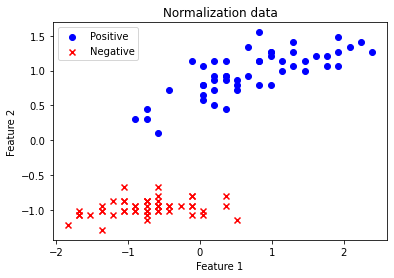

In [4]:
# 均值
u = np.mean(X, axis=0)
# 方差
v = np.std(X, axis=0)

X = (X - u) / v

# 作图
plt.scatter(X[:50, 0], X[:50, 1], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 0], X[50:, 1], color='red', marker='x', label='Negative')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.title('Normalization data')
plt.show()

### 直线初始化

In [5]:
# X加上偏置项
X = np.hstack((np.ones((X.shape[0],1)), X))
# 权重初始化
w = np.random.randn(3,1)

显示初始化直线位置：

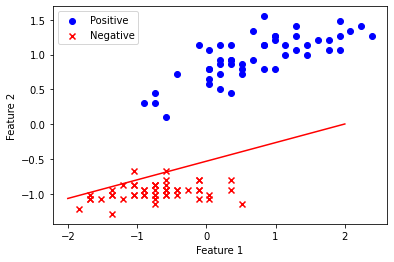

In [6]:
# 直线第一个坐标（x1，y1）
x1 = -2
y1 = -1 / w[2] * (w[0] * 1 + w[1] * x1)
# 直线第二个坐标（x2，y2）
x2 = 2
y2 = -1 / w[2] * (w[0] * 1 + w[1] * x2)
# 作图
plt.scatter(X[:50, 1], X[:50, 2], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 1], X[50:, 2], color='red', marker='x', label='Negative')
plt.plot([x1,x2], [y1,y2],'r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.show()

由上图可见，一般随机生成的分类线，错误率很高。

### 计算scores，更新权重

接下来，计算scores，得分函数与阈值0做比较，大于零则$\hat y=1$，小于零则$\hat y=-1$

In [7]:
s = np.dot(X, w)
y_pred = np.ones_like(y)    # 预测输出初始化
loc_n = np.where(s < 0)[0]    # 大于零索引下标
y_pred[loc_n] = -1

接着，从分类错误的样本中选择一个，使用PLA更新权重系数$w$。

In [8]:
# 第一个分类错误的点
t = np.where(y != y_pred)[0][0]
# 更新权重w
w += y[t] * X[t, :].reshape((3,1))

### 迭代更新训练

更新权重$w$是个迭代过程，只要存在分类错误的样本，就不断进行更新，直至所有的样本都分类正确。（注意，前提是正负样本完全可分）

In [9]:
for i in range(100):
    s = np.dot(X, w)
    y_pred = np.ones_like(y)
    loc_n = np.where(s < 0)[0]
    y_pred[loc_n] = -1
    num_fault = len(np.where(y != y_pred)[0])
    print('第%2d次更新，分类错误的点个数：%2d' % (i, num_fault))
    if num_fault == 0:
        break
    else:
        t = np.where(y != y_pred)[0][0]
        w += y[t] * X[t, :].reshape((3,1))

第 0次更新，分类错误的点个数： 9
第 1次更新，分类错误的点个数：14
第 2次更新，分类错误的点个数： 2
第 3次更新，分类错误的点个数： 1
第 4次更新，分类错误的点个数： 0


迭代完毕后，得到更新后的权重系数$w$，绘制此时的分类直线是什么样子。

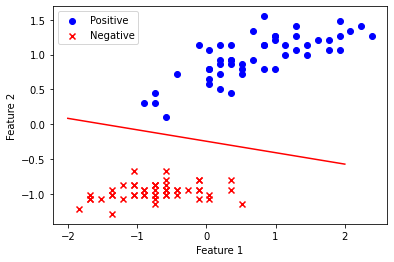

In [10]:
# 直线第一个坐标（x1，y1）
x1 = -2
y1 = -1 / w[2] * (w[0] * 1 + w[1] * x1)
# 直线第二个坐标（x2，y2）
x2 = 2
y2 = -1 / w[2] * (w[0] * 1 + w[1] * x2)
# 作图
plt.scatter(X[:50, 1], X[:50, 2], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 1], X[50:, 2], color='red', marker='x', label='Negative')
plt.plot([x1,x2], [y1,y2],'r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.show()

其实，PLA算法的效率还算不错，只需要数次更新就能找到一条能将所有样本完全分类正确的分类线。所以得出结论，对于正负样本线性可分的情况，PLA能够在有限次迭代后得到正确的分类直线。

## 5. PLA优化

刚刚我们的数据是线性可分的，可以使用PLA来得到分类直线。但是，如果数据不是线性可分，即找不到一条直线能够将所有的正负样本完全分类正确，这种情况下，似乎PLA会永远更新迭代下去，却找不到正确的分类线。所以，对于数据不可分的情况，应该要对PLA进行改进、优化。

PLA优化的基本做法很简单，就是如果迭代更新后分类错误样本比前一次少，则更新权重系数$w$；没有减少则保持当前权重系数$w$不变。也就是说，可以把条件放松，即不苛求每个点都分类正确，而是容忍有错误点，取错误点的个数最少时的权重系数$w$。通常在有限的迭代次数里，都能保证得到最佳的分类线。

### 导入数据

数据集存放在'../data/'目录下，该数据集包含了100个样本，正负样本各50，特征维度为2。

In [11]:
data = pd.read_csv('./data/data2.csv', header=None)
# 样本输入，维度（100，2）
X = data.iloc[:,:2].values
# 样本输出，维度（100，）
y = data.iloc[:,2].values

### 数据分类与可视化

下面我们在二维平面上绘出正负样本的分布情况。

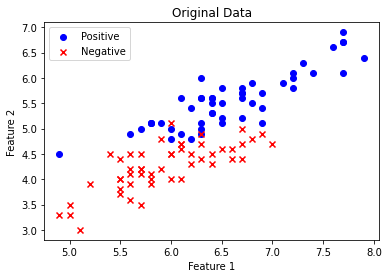

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X[:50, 0], X[:50, 1], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 0], X[50:, 1], color='red', marker='x', label='Negative')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.title('Original Data')
plt.show()

很明显，从图中可以看出，正类和负类样本并不是线性可分的。这时候，我们就需要对PCA进行改进，寻找合适的分类线。

### 特征归一化

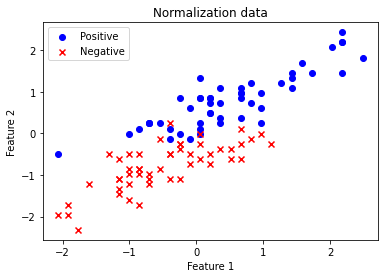

In [13]:
# 均值
u = np.mean(X, axis=0)
# 方差
v = np.std(X, axis=0)

X = (X - u) / v

# 作图
plt.scatter(X[:50, 0], X[:50, 1], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 0], X[50:, 1], color='red', marker='x', label='Negative')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.title('Normalization data')
plt.show()

### 直线初始化

In [15]:
# X加上偏置项
X = np.hstack((np.ones((X.shape[0],1)), X))
# 权重初始化
w = np.random.randn(3,1)

显示初始化直线位置

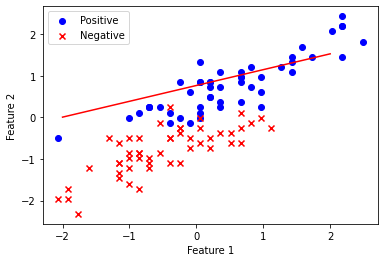

In [16]:
# 直线第一个坐标（x1，y1）
x1 = -2
y1 = -1 / w[2] * (w[0] * 1 + w[1] * x1)
# 直线第二个坐标（x2，y2）
x2 = 2
y2 = -1 / w[2] * (w[0] * 1 + w[1] * x2)
# 作图
plt.scatter(X[:50, 1], X[:50, 2], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 1], X[50:, 2], color='red', marker='x', label='Negative')
plt.plot([x1,x2], [y1,y2],'r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.show()

### 迭代更新训练

In [17]:
for i in range(100):
    s = np.dot(X, w)
    y_pred = np.ones_like(y)
    loc_n = np.where(s < 0)[0]
    y_pred[loc_n] = -1
    num_fault = len(np.where(y != y_pred)[0])
    
    if num_fault == 0:
        break
    else:
        r = np.random.choice(num_fault)        # 随机选择一个错误分类点
        t = np.where(y != y_pred)[0][r]
        w2 = w + y[t] * X[t, :].reshape((3,1))
        
        s = np.dot(X, w2)
        y_pred = np.ones_like(y)
        loc_n = np.where(s < 0)[0]
        y_pred[loc_n] = -1
        num_fault2 = len(np.where(y != y_pred)[0])
        if num_fault2 <num_fault:
            w = w2        # 犯的错误点更少，则更新w，否则w不变
            print('第%4d次更新，分类错误的点个数：%4d' % (i, num_fault2))
        else:
            print('第%2d次更新，分类错误的点个数：%2d' % (i, num_fault))        

第   0次更新，分类错误的点个数：  29
第   1次更新，分类错误的点个数：  27
第   2次更新，分类错误的点个数：  24
第   3次更新，分类错误的点个数：  23
第 4次更新，分类错误的点个数：23
第 5次更新，分类错误的点个数：23
第 6次更新，分类错误的点个数：23
第   7次更新，分类错误的点个数：  21
第 8次更新，分类错误的点个数：21
第 9次更新，分类错误的点个数：21
第10次更新，分类错误的点个数：21
第11次更新，分类错误的点个数：21
第12次更新，分类错误的点个数：21
第13次更新，分类错误的点个数：21
第14次更新，分类错误的点个数：21
第  15次更新，分类错误的点个数：  18
第16次更新，分类错误的点个数：18
第17次更新，分类错误的点个数：18
第18次更新，分类错误的点个数：18
第19次更新，分类错误的点个数：18
第20次更新，分类错误的点个数：18
第  21次更新，分类错误的点个数：  13
第22次更新，分类错误的点个数：13
第23次更新，分类错误的点个数：13
第24次更新，分类错误的点个数：13
第25次更新，分类错误的点个数：13
第26次更新，分类错误的点个数：13
第27次更新，分类错误的点个数：13
第28次更新，分类错误的点个数：13
第29次更新，分类错误的点个数：13
第30次更新，分类错误的点个数：13
第31次更新，分类错误的点个数：13
第32次更新，分类错误的点个数：13
第33次更新，分类错误的点个数：13
第34次更新，分类错误的点个数：13
第35次更新，分类错误的点个数：13
第36次更新，分类错误的点个数：13
第37次更新，分类错误的点个数：13
第38次更新，分类错误的点个数：13
第39次更新，分类错误的点个数：13
第40次更新，分类错误的点个数：13
第41次更新，分类错误的点个数：13
第42次更新，分类错误的点个数：13
第43次更新，分类错误的点个数：13
第44次更新，分类错误的点个数：13
第45次更新，分类错误的点个数：13
第46次更新，分类错误的点个数：13
第47次更新，分类错误的点个数：13
第48次更新，分类错误的点个数：13
第49次更新，分类错误的点个数：13
第50次更新，分类错误的点个数：13
第51

迭代完毕后，得到更新后的权重系数$w$，绘制此时的分类直线是什么样子。

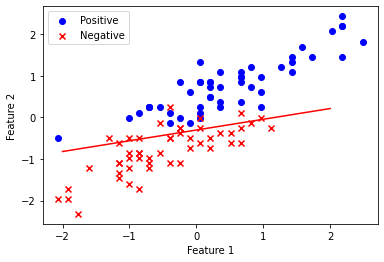

In [16]:
# 直线第一个坐标（x1，y1）
x1 = -2
y1 = -1 / w[2] * (w[0] * 1 + w[1] * x1)
# 直线第二个坐标（x2，y2）
x2 = 2
y2 = -1 / w[2] * (w[0] * 1 + w[1] * x2)
# 作图
plt.scatter(X[:50, 1], X[:50, 2], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 1], X[50:, 2], color='red', marker='x', label='Negative')
plt.plot([x1,x2], [y1,y2],'r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.show()

### 计算分类正确率：

In [17]:
s = np.dot(X, w)
y_pred = np.ones_like(y)
loc_n = np.where(s < 0)[0]
y_pred[loc_n] = -1
accuracy = len(np.where(y == y_pred)[0]) / len(y)
print('accuracy: %.2f' % accuracy)

accuracy: 0.89


### 注意：

经过实例验证，优化后的PLA算法不一定每次都能找到最优分类线。在足够的迭代次数下，使用一般的PLA算法，竟一般都能得到最佳的分类线，即使开始的时候，分类线会有所振荡。但最终都基本能寻找到最佳位置附近。这也是PLA算法的特点之一。下面是使用一般PLA算法处理非线性可分样本实例的效果。

直线初始化

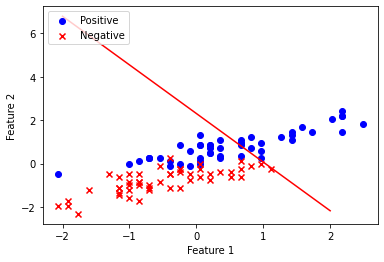

In [70]:
# 权重初始化
w = np.random.randn(3,1)

# 直线第一个坐标（x1，y1）
x1 = -2
y1 = -1 / w[2] * (w[0] * 1 + w[1] * x1)
# 直线第二个坐标（x2，y2）
x2 = 2
y2 = -1 / w[2] * (w[0] * 1 + w[1] * x2)
# 作图
plt.scatter(X[:50, 1], X[:50, 2], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 1], X[50:, 2], color='red', marker='x', label='Negative')
plt.plot([x1,x2], [y1,y2],'r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.show()

迭代训练

In [71]:
for i in range(200):
    s = np.dot(X, w)
    y_pred = np.ones_like(y)
    loc_n = np.where(s < 0)[0]
    y_pred[loc_n] = -1
    num_fault = len(np.where(y != y_pred)[0])
    print('第%2d次更新，分类错误的点个数：%2d' % (i, num_fault))
    if num_fault == 0:
        break
    else:
        t = np.where(y != y_pred)[0][0]
        w += y[t] * X[t, :].reshape((3,1))

第 0次更新，分类错误的点个数：29
第 1次更新，分类错误的点个数：18
第 2次更新，分类错误的点个数：12
第 3次更新，分类错误的点个数：37
第 4次更新，分类错误的点个数：10
第 5次更新，分类错误的点个数：21
第 6次更新，分类错误的点个数： 8
第 7次更新，分类错误的点个数：15
第 8次更新，分类错误的点个数： 7
第 9次更新，分类错误的点个数：14
第10次更新，分类错误的点个数： 7
第11次更新，分类错误的点个数：15
第12次更新，分类错误的点个数： 5
第13次更新，分类错误的点个数：13
第14次更新，分类错误的点个数： 9
第15次更新，分类错误的点个数：15
第16次更新，分类错误的点个数： 5
第17次更新，分类错误的点个数：13
第18次更新，分类错误的点个数： 9
第19次更新，分类错误的点个数：16
第20次更新，分类错误的点个数： 5
第21次更新，分类错误的点个数：12
第22次更新，分类错误的点个数： 7
第23次更新，分类错误的点个数：16
第24次更新，分类错误的点个数：19
第25次更新，分类错误的点个数：15
第26次更新，分类错误的点个数：17
第27次更新，分类错误的点个数：14
第28次更新，分类错误的点个数：16
第29次更新，分类错误的点个数：12
第30次更新，分类错误的点个数：16
第31次更新，分类错误的点个数：12
第32次更新，分类错误的点个数：16
第33次更新，分类错误的点个数：11
第34次更新，分类错误的点个数：16
第35次更新，分类错误的点个数：10
第36次更新，分类错误的点个数： 5
第37次更新，分类错误的点个数： 8
第38次更新，分类错误的点个数： 4
第39次更新，分类错误的点个数： 8
第40次更新，分类错误的点个数： 4
第41次更新，分类错误的点个数： 7
第42次更新，分类错误的点个数： 7
第43次更新，分类错误的点个数：10
第44次更新，分类错误的点个数：14
第45次更新，分类错误的点个数： 5
第46次更新，分类错误的点个数： 6
第47次更新，分类错误的点个数：10
第48次更新，分类错误的点个数：13
第49次更新，分类错误的点个数：10
第50次更新，分类错误的点个数：13
第51次更新，分类错误的点个数：10
第52次更新，分类错误的

迭代完毕后，得到更新后的权重系数$w$ ，绘制此时的分类直线是什么样子。

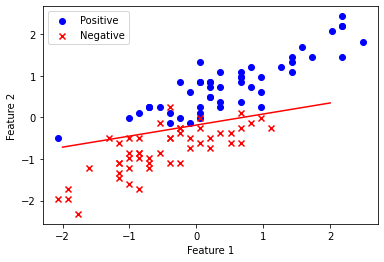

In [72]:
# 直线第一个坐标（x1，y1）
x1 = -2
y1 = -1 / w[2] * (w[0] * 1 + w[1] * x1)
# 直线第二个坐标（x2，y2）
x2 = 2
y2 = -1 / w[2] * (w[0] * 1 + w[1] * x2)
# 作图
plt.scatter(X[:50, 1], X[:50, 2], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 1], X[50:, 2], color='red', marker='x', label='Negative')
plt.plot([x1,x2], [y1,y2],'r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.show()

计算分类正确率：

In [73]:
s = np.dot(X, w)
y_pred = np.ones_like(y)
loc_n = np.where(s < 0)[0]
y_pred[loc_n] = -1
accuracy = len(np.where(y == y_pred)[0]) / len(y)
print('accuracy: %.2f' % accuracy)

accuracy: 0.93


## 总结

PLA是机器学习最简单的算法之一。PLA处理线性可分问题，优化的PLA解决线性不可分的问题。实际验证表明，一般的PLA处理线性可分及线性不可分问题都有不错的表现，即一般能得到最佳的分类直线。